<div class="alert alert-block alert-success">
<b>Lesson (1)</b>
</div>

In [1]:
import pandas as pd
import seaborn as sns

In [2]:
data=pd.read_excel('https://archive.ics.uci.edu/ml/machine-learning-databases/00242/ENB2012_data.xlsx')

In [3]:
# rename cols
columns_names = {'X1': 'Relative_Compactness',
                 'X2': 'Surface_Area',
                 'X3': 'Wall_Area',
                 'X4': 'Roof_Area',
                 'X5': 'Overall_Height',
                 'X6': 'Orientation',
                 'X7': 'Glazing_Area',
                 'X8': 'Glazing_Area_Distribution',
                 'Y1': 'Heating_Load',
                 'Y2': 'Cooling_Load'}

data = data.rename(columns=columns_names)
# to print the head of data
# print(data.head(5))

<AxesSubplot:xlabel='Relative_Compactness', ylabel='Cooling_Load'>

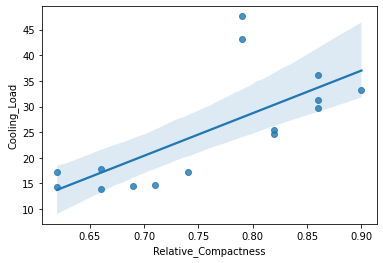

In [4]:
# select a sample of the dataset
#If you don't specify the random_state in your code, then every time you run(execute) 
#your code a new random value is generated and the train and test datasets would have different values each time.

simple_linear_reg = data[["Relative_Compactness", "Cooling_Load"]] \
    .sample(15, random_state=2)

# regression plot
sns.regplot(x="Relative_Compactness", y="Cooling_Load",
                        data=simple_linear_reg)

<div class="alert alert-block alert-success">
<b>Lesson (2)</b>
</div>

● Mean Absolute Error (MAE) 

In [5]:
#Firstly, we normalise our dataset to a common scale using the min max scaler
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
normalised_df = pd.DataFrame(scaler.fit_transform(data), columns=data.columns)

#I dropped the ['Heating_Load', 'Cooling_Load'] as they the output
features_df = normalised_df.drop(columns=['Heating_Load', 'Cooling_Load'])
heating_target = normalised_df['Heating_Load']

In [19]:
#Now, we split our dataset into the training and testing dataset. Recall that we
#had earlier segmented the features and target variables.
#https://machinelearningmastery.com/train-test-split-for-evaluating-machine-learning-algorithms/
from sklearn.model_selection import train_test_split


x_train, x_test, y_train, y_test = train_test_split(features_df, heating_target, 
                                                    test_size=0.3, random_state=1)

In [7]:
from sklearn.metrics import mean_absolute_error
from sklearn.linear_model import LinearRegression


linear_model = LinearRegression()

#fit the model to the training dataset
linear_model.fit(x_train, y_train)

#obtain predictions
predicted_values = linear_model.predict(x_test)

#MAE
mae = mean_absolute_error(y_test, predicted_values)
round(mae, 3) #prints 0.063

0.063

● Residual Sum of Squares (RSS) 

In [8]:
import numpy as np
rss = np.sum(np.square(y_test - predicted_values))
round(rss, 3) #prints 1.823

1.823

● Root Mean Square Error (RMSE)

In [9]:
from sklearn.metrics import mean_squared_error
rmse = np.sqrt(mean_squared_error(y_test, predicted_values))
round(rmse, 3) #prints 0.089

0.089

● R-Squared 

In [10]:
from sklearn.metrics import r2_score
r2_score = r2_score(y_test, predicted_values)
round(r2_score, 3) #prints 0.893

0.893

<div class="alert alert-block alert-success">
<b>Lesson (3)</b>
</div>

● Ridge Regression

In [20]:
from sklearn.linear_model import Ridge
ridge_reg = Ridge(alpha=0.5)
ridge_reg.fit(x_train, y_train)

Ridge(alpha=0.5)

● Feature Selection and Lasso Regression

In [21]:
from sklearn.linear_model import Lasso
lasso_reg = Lasso(alpha=0.001)
lasso_reg.fit(x_train, y_train)

Lasso(alpha=0.001)

In [23]:
#comparing the effects of regularisation

def get_weights_df(model, feat, col_name):
    #this function returns the weight of every feature
    weights = pd.Series(model.coef_, feat.columns).sort_values()
    weights_df = pd.DataFrame(weights).reset_index()
    weights_df.columns = ['Features', col_name]
    weights_df[col_name].round(3)
    
    return weights_df


linear_model_weights = get_weights_df(linear_model, x_train, 'Linear_Model_Weight')
ridge_weights_df = get_weights_df(ridge_reg, x_train, 'Ridge_Weight')
lasso_weights_df = get_weights_df(lasso_reg, x_train, 'Lasso_weight')
final_weights = pd.merge(linear_model_weights, ridge_weights_df, on='Features')
final_weights = pd.merge(final_weights, lasso_weights_df, on='Features')

In [ ]:
# rename cols
columns_names = {'T1' :'Temperature in kitchen area',
                 'RH_1': 'Humidity in kitchen area',
                 'T2': 'Temperature in living room area',
                 'RH_2': 'Humidity in living room area',
                 'T3': 'Temperature in laundry room area',
                 'RH_3': 'Humidity in laundry room area',
                 'T4':'Temperature in office room',
                 'RH_4': 'Humidity in office room',
                 'T5': 'Temperature in bathroom',
                 'RH_5':'Humidity in bathroom',
                 'T6': 'Temperature outside the building (north side)',
                 'RH_6': 'Humidity outside the building (north side)',
                 'T7': 'Temperature in ironing room ',
                 'RH_7': 'Humidity in ironing room',
                 'T8': 'Temperature in teenager room 2',
                 'RH_8': 'Humidity in teenager room 2',
                 'T9': 'Temperature in parents room',
                 'RH_9': 'Humidity in parents room',
                 'To': 'Temperature outside', 
                 'RH_out': 'Humidity outside' ,
                 'rv1': 'Random variable 1',
                 'rv2': 'Random variable 2'}

data = data.rename(columns=columns_names)
# to print the head of data
data.head(5)

In [ ]:
Question 12
From the dataset, fit a linear model on the relationship between the temperature in the living room in Celsius (x = T2) and the temperature outside the building (y = T6). What is the R^2 value in two d.p.?





Question 13
Normalize the dataset using the MinMaxScaler after removing the following columns: [“date”, “lights”]. The target variable is “Appliances”. Use a 70-30 train-test set split with a random state of 42 (for reproducibility). Run a multiple linear regression using the training set and evaluate your model on the test set. Answer the following questions:

What is the Mean Absolute Error (in two decimal places)?





Question 14
What is the Residual Sum of Squares (in two decimal places)?





Question 15
What is the Root Mean Squared Error (in three decimal places)?





Question 16
What is the Coefficient of Determination (in two decimal places)?





Question 17
Obtain the feature weights from your linear model above. Which features have the lowest and highest weights respectively?





Question 18
Train a ridge regression model with an alpha value of 0.4. Is there any change to the root mean squared error (RMSE) when evaluated on the test set?



Question 19
Train a lasso regression model with an alpha value of 0.001 and obtain the new feature weights with it. How many of the features have non-zero feature weights?





Question 20
What is the new RMSE with the lasso regression? (Answer should be 